In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
sales = pd.read_csv('../csvs/all_sales.csv')
sales.sale_time = sales.sale_time.astype("datetime64[ns]")
sales.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1.1.1,sale_id,ape_id,sale_price,sale_time,seller_name,seller_wallet,buyer_name,buyer_wallet
0,0,0.0,0.0,0.0,1470246435,ApeGang #4226,0.490,2021-10-21 08:27:51.055386,NaN,0xf25018fbf9d07db0e02c36824da7b444bb3c2379,diogopunk3,0xf3ba73e6d3d19cf0405486db3d44404c35b78b80
1,1,1.0,1.0,0.0,1469983558,ApeGang #9793,0.002,2021-10-21 08:01:12.181661,NaN,0x02dd1c87ccd51bfd12c5e4c04eb3ed9224ea9400,NaN,0x1d516bdec43122415726b676796736caa3cd319d
2,2,2.0,2.0,0.0,1468894965,ApeGang #2196,0.500,2021-10-21 06:11:33.290535,NaN,0x9fe59ab5ac6c00a80f5c05acd3071a22b61f25bf,GeeMoney,0x0f9ac6fdbc287c7b8d29a139845963e4f513fe15
3,3,3.0,3.0,0.0,1468769122,ApeGang #2061,0.490,2021-10-21 05:59:06.139219,NaN,0x82b04eb793777a10de5e54b6235396e60d0e4b5f,NaN,0xcfb398f869dab6f1c70c5afb6728612fad06fa8c
4,4,4.0,4.0,0.0,1468061535,ApeGang #8081,0.500,2021-10-21 04:51:32.215490,NaN,0x4f3553aa0789cbfffa469758284190cd072163bc,NaN,0xaab5612de1413e7ceb0f5deaaf27d3f85852b3b9


In [4]:
sales.shape

(10207, 12)

In [5]:
recent_sales = sales[sales.sale_time > dt.datetime(2021, 9, 1)]
recent_sales.shape

(5968, 12)

In [6]:
#how many cheap apes under .1ETH
recent_sales[recent_sales['sale_price']<0.1].shape

(13, 12)

In [7]:
#How many expensive apes over 3 ETH
recent_sales[recent_sales['sale_price']>3].shape

(42, 12)

In [8]:
apes = pd.read_csv('../csvs/all_the_apes.csv')
apes['trait_n'] = apes[['Clothes','Ears','Hat','Fur','Mouth','Eyes']].count(axis=1)

apes.head()


,Unnamed: 0,ape_id,Clothes,Ears,Hat,Fur,Mouth,Eyes,trait_n
0,0,ApeGang #9211,Magician,Gold Hoop,Banana,Strong Dark Brown,Shocked,Heart,6
1,1,ApeGang #9195,Yellow NBA Jersey,NaN,Viking Helmet,Brown,Joint,NaN,4
2,2,ApeGang #9190,Military,NaN,Cop,Brown,Tongue Out,Hippie Glasses,5
3,3,ApeGang #9181,Toga,NaN,NaN,Brown,Grin Gold,Scar,4
4,4,ApeGang #9154,Hippie,NaN,NaN,Cheetah,NaN,NaN,2


In [9]:
ape_sales = recent_sales.merge(apes, on="ape_id", how="left")
ape_sales = ape_sales[['ape_id','sale_price','sale_time','trait_n','Clothes','Ears','Hat','Fur','Mouth','Eyes']]
ape_sales.shape

(5968, 10)

In [10]:
ape_sales['day'] =ape_sales['sale_time'].dt.date
sales_by_date = ape_sales.groupby('day').count().sale_price

In [11]:
ape_sales = ape_sales[ape_sales['sale_price']>0.01] 
ape_sales.shape

(5963, 11)

In [12]:
ape_sales = ape_sales.join(ape_sales.groupby('day').median().sale_price, rsuffix='_daily_avg',on='day')
ape_sales.head()

,ape_id,sale_price,sale_time,trait_n,Clothes,Ears,Hat,Fur,Mouth,Eyes,day,sale_price_daily_avg
0,ApeGang #4226,0.49,2021-10-21 08:27:51.055386,5,Orange Striped T-Shirt,NaN,Green Beanie,Brown,Grin Gold,Diving Mask,2021-10-21,0.4825
2,ApeGang #2196,0.50,2021-10-21 06:11:33.290535,4,NaN,NaN,Yellow NBA Headband,Brown,Grillz,Hippie Glasses,2021-10-21,0.4825
3,ApeGang #2061,0.49,2021-10-21 05:59:06.139219,4,Hotel Porter,NaN,Brown Beanie,Brown,Yawn,NaN,2021-10-21,0.4825
4,ApeGang #8081,0.50,2021-10-21 04:51:32.215490,4,Military,NaN,NaN,Brown,Cigarette,Crazy,2021-10-21,0.4825
5,ApeGang #9884,0.48,2021-10-21 04:48:49.110108,4,Blue Hoodie,NaN,NaN,Zebra,Mustache,Monocle,2021-10-21,0.4825


In [13]:
ape_sales['price_diff'] = ape_sales.sale_price - ape_sales.sale_price_daily_avg
ape_sales.head(2)

,ape_id,sale_price,sale_time,trait_n,Clothes,Ears,Hat,Fur,Mouth,Eyes,day,sale_price_daily_avg,price_diff
0,ApeGang #4226,0.49,2021-10-21 08:27:51.055386,5,Orange Striped T-Shirt,NaN,Green Beanie,Brown,Grin Gold,Diving Mask,2021-10-21,0.4825,0.0075
2,ApeGang #2196,0.50,2021-10-21 06:11:33.290535,4,NaN,NaN,Yellow NBA Headband,Brown,Grillz,Hippie Glasses,2021-10-21,0.4825,0.0175


C:\Users\Samue\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


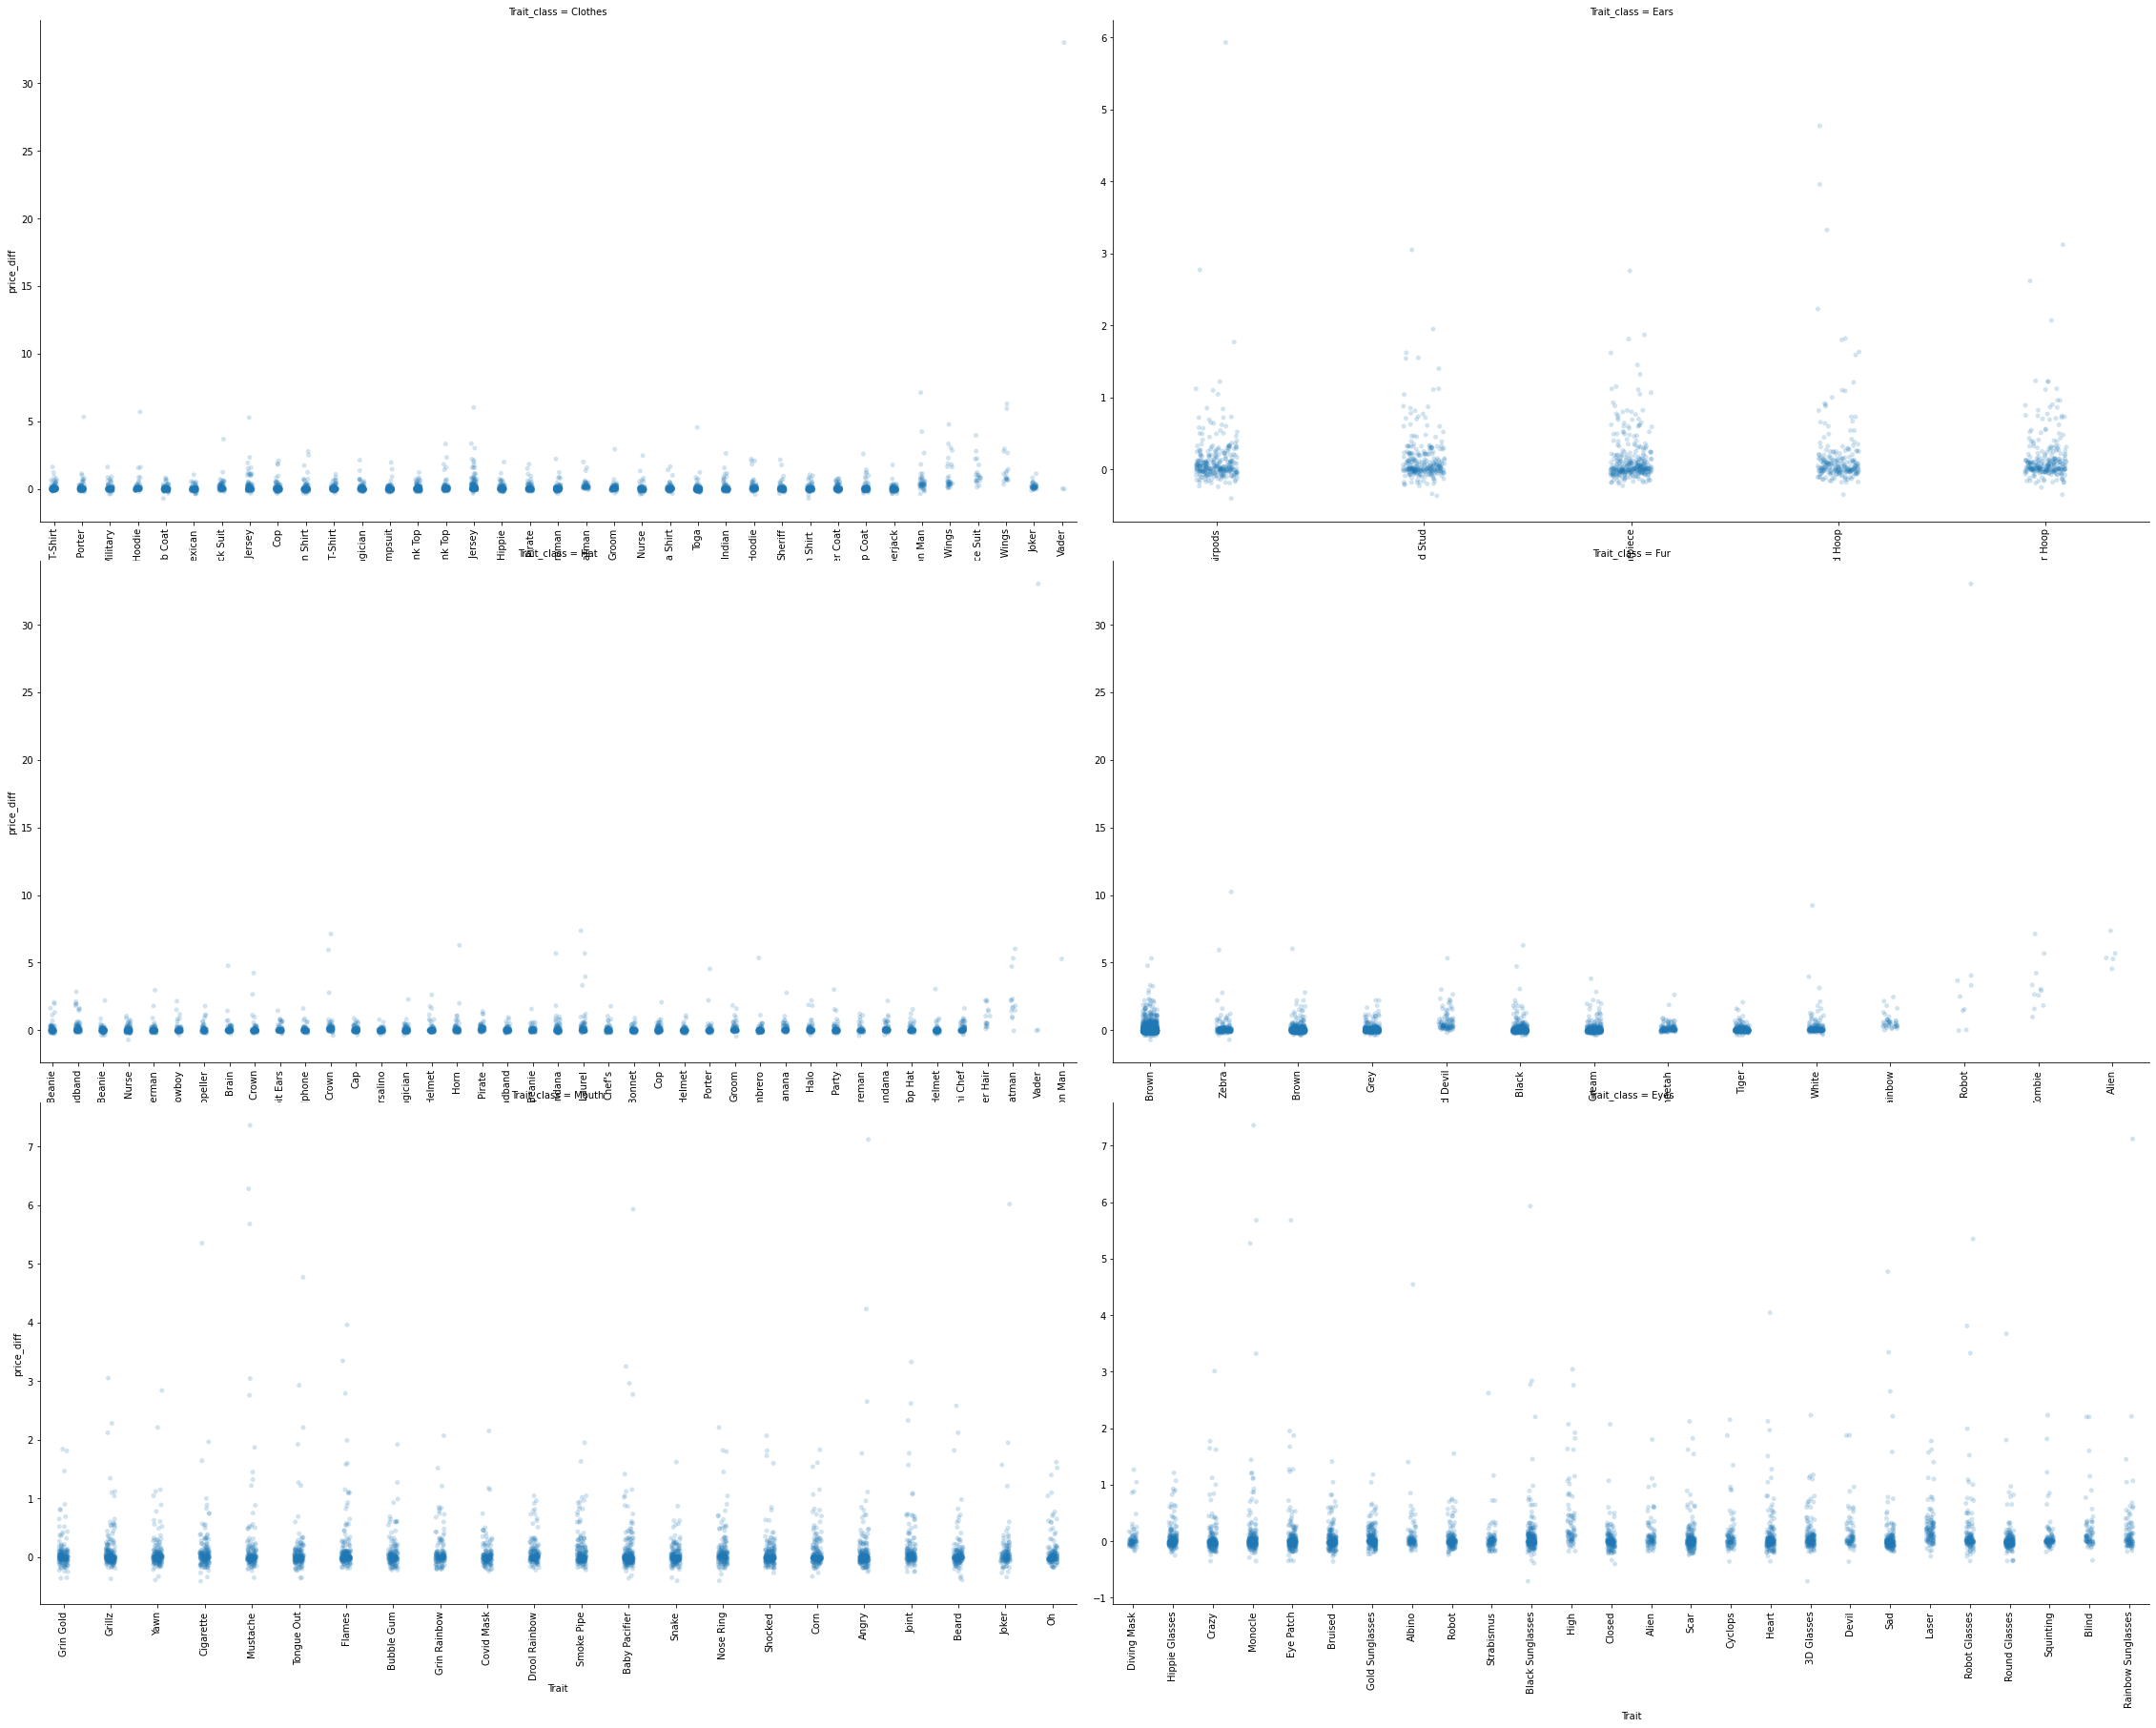

In [14]:

sales_melt =ape_sales[['Clothes','Ears','Hat','Fur','Mouth','Eyes','price_diff','ape_id']]
sales_melt = pd.melt(sales_melt, id_vars=['ape_id','price_diff'], value_vars=['Clothes','Ears','Hat','Fur','Mouth','Eyes'],
        var_name='Trait_class', value_name='Trait')

g = sns.FacetGrid(sales_melt, col="Trait_class", col_wrap=2,sharex=False, sharey=False,height=8,aspect=2)
g.map(sns.stripplot, "Trait",'price_diff',jitter=0.1,alpha=.2)
g.set_xticklabels(rotation=90)



In [15]:
df = pd.get_dummies(ape_sales[['Clothes','Ears','Hat','Fur','Mouth','Eyes','price_diff','trait_n','ape_id']],
                    columns = ['Clothes','Ears','Hat','Fur','Mouth','Eyes'])
list(df.columns)

['price_diff',
 'trait_n',
 'ape_id',
 'Clothes_Angel Wings',
 'Clothes_Banana Shirt',
 'Clothes_Batman',
 'Clothes_Black Suit',
 'Clothes_Black Tank Top',
 'Clothes_Blue Hoodie',
 'Clothes_Cop',
 'Clothes_Devil Wings',
 'Clothes_Fireman',
 'Clothes_Grey Striped T-Shirt',
 'Clothes_Groom',
 'Clothes_Hippie',
 'Clothes_Hotel Porter',
 'Clothes_Indian',
 'Clothes_Iron Man',
 'Clothes_Joker',
 'Clothes_Lab Coat',
 'Clothes_Lumberjack',
 'Clothes_Magician',
 'Clothes_Mexican',
 'Clothes_Military',
 'Clothes_Nurse',
 'Clothes_Orange Hawaiian Shirt ',
 'Clothes_Orange Striped T-Shirt',
 'Clothes_Pimp Coat',
 'Clothes_Pirate',
 'Clothes_Prison Jumpsuit',
 'Clothes_Purple Hoodie',
 'Clothes_Red Hawaiian Shirt',
 'Clothes_Red NBA Jersey',
 'Clothes_Sheriff',
 'Clothes_Space Suit',
 'Clothes_Toga',
 'Clothes_Vader',
 'Clothes_White Tank Top',
 'Clothes_Winter Coat',
 'Clothes_Yellow NBA Jersey',
 'Ears_Airpods',
 'Ears_Bluetooth Earpiece',
 'Ears_Diamond Stud',
 'Ears_Gold Hoop',
 'Ears_Silver H

In [16]:
pd.set_option('display.max_columns', None)
df[df.ape_id =='ApeGang #2196']
df = df.drop(columns='ape_id')

In [17]:
num_cols = ['trait_n']
df[num_cols].isnull().sum() # no missing values


trait_n    0
dtype: int64

In [18]:
scaler = StandardScaler()
scaler.fit(df[num_cols])


StandardScaler()

In [19]:
df[num_cols] = scaler.transform(df[num_cols])
df.head()

,price_diff,trait_n,Clothes_Angel Wings,Clothes_Banana Shirt,Clothes_Batman,Clothes_Black Suit,Clothes_Black Tank Top,Clothes_Blue Hoodie,Clothes_Cop,Clothes_Devil Wings,Clothes_Fireman,Clothes_Grey Striped T-Shirt,Clothes_Groom,Clothes_Hippie,Clothes_Hotel Porter,Clothes_Indian,Clothes_Iron Man,Clothes_Joker,Clothes_Lab Coat,Clothes_Lumberjack,Clothes_Magician,Clothes_Mexican,Clothes_Military,Clothes_Nurse,Clothes_Orange Hawaiian Shirt,Clothes_Orange Striped T-Shirt,Clothes_Pimp Coat,Clothes_Pirate,Clothes_Prison Jumpsuit,Clothes_Purple Hoodie,Clothes_Red Hawaiian Shirt,Clothes_Red NBA Jersey,Clothes_Sheriff,Clothes_Space Suit,Clothes_Toga,Clothes_Vader,Clothes_White Tank Top,Clothes_Winter Coat,Clothes_Yellow NBA Jersey,Ears_Airpods,Ears_Bluetooth Earpiece,Ears_Diamond Stud,Ears_Gold Hoop,Ears_Silver Hoop,Hat_Banana,Hat_Bandana,Hat_Batman,Hat_Borsalino,Hat_Brain,Hat_Brown Beanie,Hat_Cap,Hat_Chef's,Hat_Cop,Hat_Cowboy,Hat_Crown,Hat_Fireman,Hat_Fisherman,Hat_Flower Crown,Hat_Green Beanie,Hat_Groom,Hat_Halo,Hat_Headphone,Hat_Hippie Bandana,Hat_Horn,Hat_Hotel Porter,Hat_Iron Man,Hat_Joker Hair,Hat_Laurel,Hat_Magician,Hat_Military Helmet,Hat_Nurse,Hat_Party,Hat_Pirate,Hat_Propeller,Hat_Purple Beanie,Hat_Rabbit Ears,Hat_Red NBA Headband,Hat_Sombrero,Hat_Stuntman Helmet,Hat_Sushi Chef,Hat_Top Hat,Hat_Vader,Hat_Viking Helmet,Hat_War Bonnet,Hat_Yellow NBA Headband,Fur_Alien,Fur_Black,Fur_Brown,Fur_Cheetah,Fur_Cream,Fur_Grey,Fur_Rainbow,Fur_Red Devil,Fur_Robot,Fur_Strong Dark Brown,Fur_Tiger,Fur_White,Fur_Zebra,Fur_Zombie,Mouth_Angry,Mouth_Baby Pacifier,Mouth_Beard,Mouth_Bubble Gum,Mouth_Cigarette,Mouth_Corn,Mouth_Covid Mask,Mouth_Drool Rainbow,Mouth_Flames,Mouth_Grillz,Mouth_Grin Gold,Mouth_Grin Rainbow,Mouth_Joint,Mouth_Joker,Mouth_Mustache,Mouth_Nose Ring,Mouth_Oh,Mouth_Shocked,Mouth_Smoke Pipe,Mouth_Snake,Mouth_Tongue Out,Mouth_Yawn,Eyes_3D Glasses,Eyes_Albino,Eyes_Alien,Eyes_Black Sunglasses,Eyes_Blind,Eyes_Bruised,Eyes_Closed,Eyes_Crazy,Eyes_Cyclops,Eyes_Devil,Eyes_Diving Mask,Eyes_Eye Patch,Eyes_Gold Sunglasses,Eyes_Heart,Eyes_High,Eyes_Hippie Glasses,Eyes_Laser,Eyes_Monocle,Eyes_Rainbow Sunglasses,Eyes_Robot,Eyes_Robot Glasses,Eyes_Round Glasses,Eyes_Sad,Eyes_Scar,Eyes_Squinting,Eyes_Strabismus
0,0.0075,1.062958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0175,-0.035174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0075,-0.035174,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0175,-0.035174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.0025,-0.035174,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [20]:
df.head()
x= df.drop(columns='price_diff')
y= df['price_diff']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(x,y)

RandomForestRegressor(n_estimators=500)

In [23]:
y_pred = rf.predict(X_test)


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5981496467644792

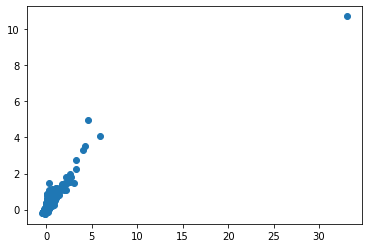

In [25]:

plt.plot(y_test, y_pred, 'o')


Text(0.5, 0, 'Random Forest Feature Importance')

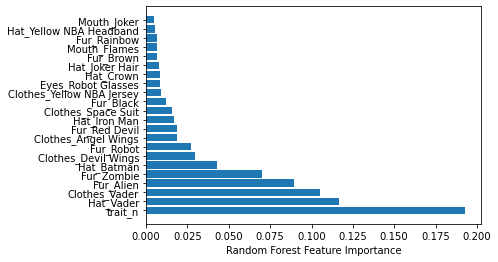

In [26]:
#look at feature importances
sorted_idx = rf.feature_importances_.argsort()[::-1]
#x.columns[sorted_idx]
plt.barh(x.columns[sorted_idx[0:22]], rf.feature_importances_[sorted_idx[0:22]])
plt.xlabel("Random Forest Feature Importance")

In [27]:
all_listings = pd.read_csv('../csvs/all_the_apes.csv')
#all_listings = all_listings[all_listings.is_private == False]
#all_listings = all_listings[all_listings.auction_type != "english"]
#all_listings.listing_event_time = all_listings.listing_event_time.astype("datetime64[ns]")
#all_listings = all_listings.sort(columns=["ape_id", "listing_event_time"])
#all_listings = all_listings.sort_values(by=["ape_id", "listing_event_time"])
#recent_listing = all_listings.drop_duplicates(subset=['ape_id'], keep='last')[['ape_id','listing_price','auction_type','payment_token']]
all_listings.head(10)

,Unnamed: 0,ape_id,Clothes,Ears,Hat,Fur,Mouth,Eyes
0,0,ApeGang #9211,Magician,Gold Hoop,Banana,Strong Dark Brown,Shocked,Heart
1,1,ApeGang #9195,Yellow NBA Jersey,NaN,Viking Helmet,Brown,Joint,NaN
2,2,ApeGang #9190,Military,NaN,Cop,Brown,Tongue Out,Hippie Glasses
3,3,ApeGang #9181,Toga,NaN,NaN,Brown,Grin Gold,Scar
4,4,ApeGang #9154,Hippie,NaN,NaN,Cheetah,NaN,NaN
5,5,ApeGang #9152,NaN,NaN,Red NBA Headband,Brown,Bubble Gum,NaN
6,6,ApeGang #9144,Banana Shirt,Bluetooth Earpiece,Cop,Brown,NaN,Scar
7,7,ApeGang #9132,Purple Hoodie,NaN,Green Beanie,Brown,NaN,NaN
8,8,ApeGang #6981,Hotel Porter,Silver Hoop,NaN,Cream,Grin Rainbow,NaN
9,9,ApeGang #6275,NaN,NaN,Chef's,Black,Grin Rainbow,3D Glasses


In [28]:
all_listings.ape_id.value_counts() #listing counts per ape

ApeGang #3630    1
ApeGang #4894    1
ApeGang #1965    1
ApeGang #7434    1
ApeGang #1982    1
                ..
ApeGang #9294    1
ApeGang #6310    1
ApeGang #2673    1
ApeGang #1282    1
ApeGang #5348    1
Name: ape_id, Length: 10000, dtype: int64

In [29]:
all_listings[all_listings.ape_id =='ApeGang #203']

,Unnamed: 0,ape_id,Clothes,Ears,Hat,Fur,Mouth,Eyes
9796,9796,ApeGang #203,Orange Hawaiian Shirt,NaN,Groom,Brown,NaN,NaN


In [30]:
recent_listing[recent_listing.ape_id =='ApeGang #203'] # can see only last isting has been kept

NameError: name 'recent_listing' is not defined

In [ ]:
listing_ape = recent_listing.merge(apes, on="ape_id", how="left")
listing_ape.shape


(3359, 12)

In [ ]:
df2 = pd.get_dummies(listing_ape[['Clothes','Ears','Hat','Fur','Mouth','Eyes','trait_n','ape_id','listing_price']],
                    columns = ['Clothes','Ears','Hat','Fur','Mouth','Eyes'])
df2.head()

,trait_n,ape_id,listing_price,Clothes_Angel Wings,Clothes_Banana Shirt,Clothes_Batman,Clothes_Black Suit,Clothes_Black Tank Top,Clothes_Blue Hoodie,Clothes_Cop,Clothes_Devil Wings,Clothes_Fireman,Clothes_Grey Striped T-Shirt,Clothes_Groom,Clothes_Hippie,Clothes_Hotel Porter,Clothes_Indian,Clothes_Iron Man,Clothes_Joker,Clothes_Lab Coat,Clothes_Lumberjack,Clothes_Magician,Clothes_Mexican,Clothes_Military,Clothes_Nurse,Clothes_Orange Hawaiian Shirt,Clothes_Orange Striped T-Shirt,Clothes_Pimp Coat,Clothes_Pirate,Clothes_Prison Jumpsuit,Clothes_Purple Hoodie,Clothes_Red Hawaiian Shirt,Clothes_Red NBA Jersey,Clothes_Sheriff,Clothes_Space Suit,Clothes_Toga,Clothes_Vader,Clothes_White Tank Top,Clothes_Winter Coat,Clothes_Yellow NBA Jersey,Ears_Airpods,Ears_Bluetooth Earpiece,Ears_Diamond Stud,Ears_Gold Hoop,Ears_Silver Hoop,Hat_Banana,Hat_Bandana,Hat_Batman,Hat_Borsalino,Hat_Brain,Hat_Brown Beanie,Hat_Cap,Hat_Chef's,Hat_Cop,Hat_Cowboy,Hat_Crown,Hat_Fireman,Hat_Fisherman,Hat_Flower Crown,Hat_Green Beanie,Hat_Groom,Hat_Halo,Hat_Headphone,Hat_Hippie Bandana,Hat_Horn,Hat_Hotel Porter,Hat_Iron Man,Hat_Joker Hair,Hat_Laurel,Hat_Magician,Hat_Military Helmet,Hat_Nurse,Hat_Party,Hat_Pirate,Hat_Propeller,Hat_Purple Beanie,Hat_Rabbit Ears,Hat_Red NBA Headband,Hat_Sombrero,Hat_Stuntman Helmet,Hat_Sushi Chef,Hat_Top Hat,Hat_Vader,Hat_Viking Helmet,Hat_War Bonnet,Hat_Yellow NBA Headband,Fur_Alien,Fur_Black,Fur_Brown,Fur_Cheetah,Fur_Cream,Fur_Ghost,Fur_Grey,Fur_Rainbow,Fur_Red Devil,Fur_Robot,Fur_Strong Dark Brown,Fur_Tiger,Fur_White,Fur_Zebra,Fur_Zombie,Mouth_Angry,Mouth_Baby Pacifier,Mouth_Beard,Mouth_Bubble Gum,Mouth_Cigarette,Mouth_Corn,Mouth_Covid Mask,Mouth_Drool Rainbow,Mouth_Flames,Mouth_Grillz,Mouth_Grin Gold,Mouth_Grin Rainbow,Mouth_Joint,Mouth_Joker,Mouth_Mustache,Mouth_Nose Ring,Mouth_Oh,Mouth_Shocked,Mouth_Smoke Pipe,Mouth_Snake,Mouth_Tongue Out,Mouth_Yawn,Eyes_3D Glasses,Eyes_Albino,Eyes_Alien,Eyes_Black Sunglasses,Eyes_Blind,Eyes_Bruised,Eyes_Closed,Eyes_Crazy,Eyes_Cyclops,Eyes_Devil,Eyes_Diving Mask,Eyes_Eye Patch,Eyes_Gold Sunglasses,Eyes_Heart,Eyes_High,Eyes_Hippie Glasses,Eyes_Laser,Eyes_Monocle,Eyes_Rainbow Sunglasses,Eyes_Robot,Eyes_Robot Glasses,Eyes_Round Glasses,Eyes_Sad,Eyes_Scar,Eyes_Squinting,Eyes_Strabismus
0,6,ApeGang #0,3.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4,ApeGang #10,39.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5,ApeGang #100,2.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,ApeGang #1005,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,ApeGang #101,1.35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2[num_cols] = scaler.transform(df2[num_cols])
df2.head()

,trait_n,ape_id,listing_price,Clothes_Angel Wings,Clothes_Banana Shirt,Clothes_Batman,Clothes_Black Suit,Clothes_Black Tank Top,Clothes_Blue Hoodie,Clothes_Cop,Clothes_Devil Wings,Clothes_Fireman,Clothes_Grey Striped T-Shirt,Clothes_Groom,Clothes_Hippie,Clothes_Hotel Porter,Clothes_Indian,Clothes_Iron Man,Clothes_Joker,Clothes_Lab Coat,Clothes_Lumberjack,Clothes_Magician,Clothes_Mexican,Clothes_Military,Clothes_Nurse,Clothes_Orange Hawaiian Shirt,Clothes_Orange Striped T-Shirt,Clothes_Pimp Coat,Clothes_Pirate,Clothes_Prison Jumpsuit,Clothes_Purple Hoodie,Clothes_Red Hawaiian Shirt,Clothes_Red NBA Jersey,Clothes_Sheriff,Clothes_Space Suit,Clothes_Toga,Clothes_Vader,Clothes_White Tank Top,Clothes_Winter Coat,Clothes_Yellow NBA Jersey,Ears_Airpods,Ears_Bluetooth Earpiece,Ears_Diamond Stud,Ears_Gold Hoop,Ears_Silver Hoop,Hat_Banana,Hat_Bandana,Hat_Batman,Hat_Borsalino,Hat_Brain,Hat_Brown Beanie,Hat_Cap,Hat_Chef's,Hat_Cop,Hat_Cowboy,Hat_Crown,Hat_Fireman,Hat_Fisherman,Hat_Flower Crown,Hat_Green Beanie,Hat_Groom,Hat_Halo,Hat_Headphone,Hat_Hippie Bandana,Hat_Horn,Hat_Hotel Porter,Hat_Iron Man,Hat_Joker Hair,Hat_Laurel,Hat_Magician,Hat_Military Helmet,Hat_Nurse,Hat_Party,Hat_Pirate,Hat_Propeller,Hat_Purple Beanie,Hat_Rabbit Ears,Hat_Red NBA Headband,Hat_Sombrero,Hat_Stuntman Helmet,Hat_Sushi Chef,Hat_Top Hat,Hat_Vader,Hat_Viking Helmet,Hat_War Bonnet,Hat_Yellow NBA Headband,Fur_Alien,Fur_Black,Fur_Brown,Fur_Cheetah,Fur_Cream,Fur_Ghost,Fur_Grey,Fur_Rainbow,Fur_Red Devil,Fur_Robot,Fur_Strong Dark Brown,Fur_Tiger,Fur_White,Fur_Zebra,Fur_Zombie,Mouth_Angry,Mouth_Baby Pacifier,Mouth_Beard,Mouth_Bubble Gum,Mouth_Cigarette,Mouth_Corn,Mouth_Covid Mask,Mouth_Drool Rainbow,Mouth_Flames,Mouth_Grillz,Mouth_Grin Gold,Mouth_Grin Rainbow,Mouth_Joint,Mouth_Joker,Mouth_Mustache,Mouth_Nose Ring,Mouth_Oh,Mouth_Shocked,Mouth_Smoke Pipe,Mouth_Snake,Mouth_Tongue Out,Mouth_Yawn,Eyes_3D Glasses,Eyes_Albino,Eyes_Alien,Eyes_Black Sunglasses,Eyes_Blind,Eyes_Bruised,Eyes_Closed,Eyes_Crazy,Eyes_Cyclops,Eyes_Devil,Eyes_Diving Mask,Eyes_Eye Patch,Eyes_Gold Sunglasses,Eyes_Heart,Eyes_High,Eyes_Hippie Glasses,Eyes_Laser,Eyes_Monocle,Eyes_Rainbow Sunglasses,Eyes_Robot,Eyes_Robot Glasses,Eyes_Round Glasses,Eyes_Sad,Eyes_Scar,Eyes_Squinting,Eyes_Strabismus
0,2.161089,ApeGang #0,3.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.035174,ApeGang #10,39.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1.062958,ApeGang #100,2.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.035174,ApeGang #1005,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.062958,ApeGang #101,1.35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#predict price_diff of all current listings
df2_pred = rf.predict(df2[X_train.columns]) #only input columns in training set for predictions
df2['pred_price_diff'] = df2_pred
df2.head()

,trait_n,ape_id,listing_price,Clothes_Angel Wings,Clothes_Banana Shirt,Clothes_Batman,Clothes_Black Suit,Clothes_Black Tank Top,Clothes_Blue Hoodie,Clothes_Cop,Clothes_Devil Wings,Clothes_Fireman,Clothes_Grey Striped T-Shirt,Clothes_Groom,Clothes_Hippie,Clothes_Hotel Porter,Clothes_Indian,Clothes_Iron Man,Clothes_Joker,Clothes_Lab Coat,Clothes_Lumberjack,Clothes_Magician,Clothes_Mexican,Clothes_Military,Clothes_Nurse,Clothes_Orange Hawaiian Shirt,Clothes_Orange Striped T-Shirt,Clothes_Pimp Coat,Clothes_Pirate,Clothes_Prison Jumpsuit,Clothes_Purple Hoodie,Clothes_Red Hawaiian Shirt,Clothes_Red NBA Jersey,Clothes_Sheriff,Clothes_Space Suit,Clothes_Toga,Clothes_Vader,Clothes_White Tank Top,Clothes_Winter Coat,Clothes_Yellow NBA Jersey,Ears_Airpods,Ears_Bluetooth Earpiece,Ears_Diamond Stud,Ears_Gold Hoop,Ears_Silver Hoop,Hat_Banana,Hat_Bandana,Hat_Batman,Hat_Borsalino,Hat_Brain,Hat_Brown Beanie,Hat_Cap,Hat_Chef's,Hat_Cop,Hat_Cowboy,Hat_Crown,Hat_Fireman,Hat_Fisherman,Hat_Flower Crown,Hat_Green Beanie,Hat_Groom,Hat_Halo,Hat_Headphone,Hat_Hippie Bandana,Hat_Horn,Hat_Hotel Porter,Hat_Iron Man,Hat_Joker Hair,Hat_Laurel,Hat_Magician,Hat_Military Helmet,Hat_Nurse,Hat_Party,Hat_Pirate,Hat_Propeller,Hat_Purple Beanie,Hat_Rabbit Ears,Hat_Red NBA Headband,Hat_Sombrero,Hat_Stuntman Helmet,Hat_Sushi Chef,Hat_Top Hat,Hat_Vader,Hat_Viking Helmet,Hat_War Bonnet,Hat_Yellow NBA Headband,Fur_Alien,Fur_Black,Fur_Brown,Fur_Cheetah,Fur_Cream,Fur_Ghost,Fur_Grey,Fur_Rainbow,Fur_Red Devil,Fur_Robot,Fur_Strong Dark Brown,Fur_Tiger,Fur_White,Fur_Zebra,Fur_Zombie,Mouth_Angry,Mouth_Baby Pacifier,Mouth_Beard,Mouth_Bubble Gum,Mouth_Cigarette,Mouth_Corn,Mouth_Covid Mask,Mouth_Drool Rainbow,Mouth_Flames,Mouth_Grillz,Mouth_Grin Gold,Mouth_Grin Rainbow,Mouth_Joint,Mouth_Joker,Mouth_Mustache,Mouth_Nose Ring,Mouth_Oh,Mouth_Shocked,Mouth_Smoke Pipe,Mouth_Snake,Mouth_Tongue Out,Mouth_Yawn,Eyes_3D Glasses,Eyes_Albino,Eyes_Alien,Eyes_Black Sunglasses,Eyes_Blind,Eyes_Bruised,Eyes_Closed,Eyes_Crazy,Eyes_Cyclops,Eyes_Devil,Eyes_Diving Mask,Eyes_Eye Patch,Eyes_Gold Sunglasses,Eyes_Heart,Eyes_High,Eyes_Hippie Glasses,Eyes_Laser,Eyes_Monocle,Eyes_Rainbow Sunglasses,Eyes_Robot,Eyes_Robot Glasses,Eyes_Round Glasses,Eyes_Sad,Eyes_Scar,Eyes_Squinting,Eyes_Strabismus,pred_price_diff
0,2.161089,ApeGang #0,3.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.789316
1,-0.035174,ApeGang #10,39.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.129230
2,1.062958,ApeGang #100,2.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.257456
3,-0.035174,ApeGang #1005,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.108276
4,1.062958,ApeGang #101,1.35,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.045816


In [ ]:
#find median ETH sale price for most recent date
last_day_sale = ape_sales[ape_sales.day == ape_sales.day.max()].reset_index()
last_day_sale_median = last_day_sale.sale_price_daily_avg[0]
df2['pred_ETH_value'] = df2['pred_price_diff']+last_day_sale_median
df2['pred_discount'] = df2['pred_ETH_value']-df2['listing_price']


In [ ]:
##find best value apes
best_value = df2[['ape_id','listing_price',
                  'pred_price_diff','pred_ETH_value','pred_discount']].sort_values(by='pred_discount', ascending=False)
best_value = best_value.merge(apes.drop(columns='Unnamed: 0'), on="ape_id", how="left")
best_value.head(20)

,ape_id,listing_price,pred_price_diff,pred_ETH_value,pred_discount,Clothes,Ears,Hat,Fur,Mouth,Eyes,trait_n
0,ApeGang #2838,5.0000,4.934821,5.414821,0.414821,Toga,NaN,Hotel Porter,Alien,NaN,Albino,4
1,ApeGang #1040,1.2000,1.099758,1.579758,0.379758,NaN,NaN,NaN,Black,NaN,Crazy,2
2,ApeGang #3878,0.7500,0.645190,1.125190,0.375190,NaN,NaN,NaN,Rainbow,NaN,Monocle,2
3,ApeGang #2118,0.6500,0.432331,0.912331,0.262331,NaN,NaN,NaN,Tiger,NaN,Squinting,2
4,ApeGang #6169,0.7500,0.513205,0.993205,0.243205,Hotel Porter,NaN,NaN,Red Devil,NaN,NaN,2
5,ApeGang #6397,0.5400,0.291856,0.771856,0.231856,Grey Striped T-Shirt,Diamond Stud,Propeller,Brown,Shocked,High,6
6,ApeGang #4012,0.6950,0.401355,0.881355,0.186355,Iron Man,Diamond Stud,NaN,Tiger,Cigarette,Monocle,5
7,ApeGang #5608,0.5900,0.283984,0.763984,0.173984,White Tank Top,NaN,NaN,Black,NaN,NaN,2
8,ApeGang #8559,1.1500,0.839027,1.319027,0.169027,Devil Wings,Bluetooth Earpiece,NaN,Brown,NaN,Heart,4
9,ApeGang #1648,0.7000,0.386797,0.866797,0.166797,Banana Shirt,Diamond Stud,Chef's,Strong Dark Brown,Shocked,Heart,6
